# Inaugural Project

Hi! Welcome to my Inaugural Project...

Here I import modules and autoreload them, so to make the code run smoothly. 
<br>
I also import the model from the folder $\texttt{inauguralproject}$ which this code refers to.

In [1]:

# import modules
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# model
from inauguralproject import HouseholdSpecializationModelClass

I use a general style for all my plots!

In [2]:
# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# Question 1

To solve the first question I call the model. 
<br>
I then create two vectors, one for the values of $\alpha$ and one for the values of $\sigma$.
<br> 
Having specified the vectors, I create empty lists to append the results. 
<br>
I solve the model for varying $\alpha$ and $\sigma$ values using a nested $\texttt{for loop}$.
<br>
The $\texttt{for loop}$ loops through each value of $\alpha$ and $\sigma$, thus to create $3*3=9$ values of $H_F/H_M$.

In [3]:
# call the model
model = HouseholdSpecializationModelClass()

# vector of alpha and sigma
alpha_vec = [0.25, 0.50, 0.75]
sigma_vec = [0.5, 1.0, 1.5]

# empty lists
HF_HM_list = []
alpha_list = []
sigma_list = []


# solve model for alpha, sigma and HF_HM
for alpha in alpha_vec:
    model.par.alpha = alpha
    for sigma in sigma_vec:
        model.par.sigma = sigma
        opt = model.solve_discrete()
        HF_HM = opt.HF / opt.HM
        HF_HM_list.append(HF_HM)
        alpha_list.append(alpha)
        sigma_list.append(sigma)
        print(f'HF/HM = {HF_HM:.3f} for alpha = {alpha}, sigma = {sigma}')

c:\Users\jonas\OneDrive - University of Copenhagen\Desktop\Prognum\projects-2023-jts\inauguralproject\inauguralproject.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


HF/HM = 0.545 for alpha = 0.25, sigma = 0.5
HF/HM = 0.308 for alpha = 0.25, sigma = 1.0
HF/HM = 0.214 for alpha = 0.25, sigma = 1.5
HF/HM = 1.000 for alpha = 0.5, sigma = 0.5
HF/HM = 1.000 for alpha = 0.5, sigma = 1.0
HF/HM = 1.000 for alpha = 0.5, sigma = 1.5
HF/HM = 1.833 for alpha = 0.75, sigma = 0.5
HF/HM = 3.250 for alpha = 0.75, sigma = 1.0
HF/HM = 4.667 for alpha = 0.75, sigma = 1.5


To present the results I use $\texttt{pd.Dataframe}$ to create a pivot table.


In [4]:
# create dataframe 
df = pd.DataFrame({'alpha': alpha_list, 'sigma': sigma_list, 'HF/HM': HF_HM_list})

# convert it into a pivot table
table = pd.pivot_table(df, values='HF/HM', index='sigma', columns='alpha')

# Print the pivot table
print(table)

alpha      0.25  0.50      0.75
sigma                          
0.5    0.545455   1.0  1.833333
1.0    0.307692   1.0  3.250000
1.5    0.214286   1.0  4.666667


From the table, it is apparent that, all else being equal, a higher value of $\alpha$ - which determines women's productivity in home production relative to men - results in a larger amount of home production for women.
<br>
The elasticity of substitution, $\sigma$, greatly depends on the value of $\alpha$. Therefore, a low value of $\alpha$ and a high value of $\sigma$ result in a lower amount of home production for women. The interpretation is that men are more productive at home than women given a low value of $\alpha$, and it is easier to substitute home production for market production - vice versa.



# Question 2

I solved question 2 using a method very similar to that of question 1, with the exception that I utilized $\texttt{np}$ to take logarithms.

In [5]:
model = HouseholdSpecializationModelClass()

# empty lists for log(HF/HM) and log(wF/wM)
log_HF_HM_list = []
log_wF_wM_list = []

# calculate values
for wF in model.par.wF_vec:
    model.par.wF = wF
    opt = model.solve_discrete()
    log_HF_HM = np.log(opt.HF/opt.HM)
    log_HF_HM_list.append(log_HF_HM)
    log_wF_wM = np.log(wF/model.par.wM)
    log_wF_wM_list.append(log_wF_wM)


#print(log_HF_HM_list)
#print(log_wF_wM_list)

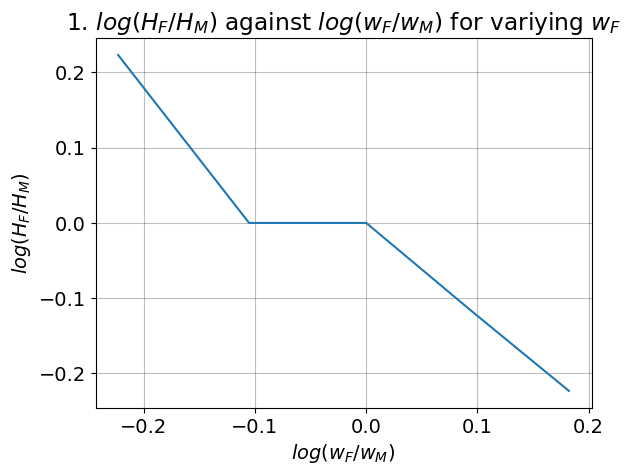

In [6]:
# figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_wF_wM_list,log_HF_HM_list)

ax.set_title('1. $log(H_F/H_M)$ against $log(w_F/w_M)$ for variying $w_F$')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$');

Based on the graph, one can draw a normative economic conclusion that as women's earnings relative to men's increase, their engagement in home production decreases relative to men.

# Question 3

Similarly to question two, the approach remains unchanged except that I solve continuously for $L_M$, $L_F$, $H_M$, and $H_F$ instead of discretely using $\texttt{scipy}$.
<br>
This modification should eliminate the kink in figure 1, albeit dull, it should enhance the visual appeal.

In [7]:
model = HouseholdSpecializationModelClass()

# empty list for log(HF/HM) and log(wF/wM)
c_log_HF_HM_list = []
c_log_wF_wM_list = []

for wF in model.par.wF_vec:
    model.par.wF = wF
    opt = model.solve()
    c_log_HF_HM = np.log(opt.HF/opt.HM)
    c_log_HF_HM_list.append(c_log_HF_HM)
    c_log_wF_wM = np.log(wF/model.par.wM)
    c_log_wF_wM_list.append(c_log_wF_wM)


#print(c_log_HF_HM_list)
#print(c_log_wF_wM_list)

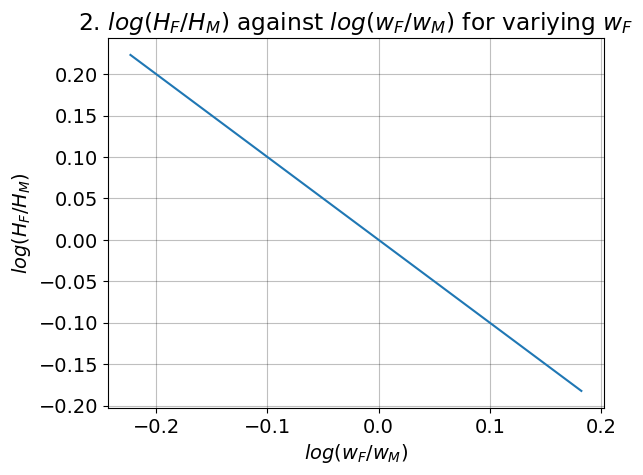

In [8]:
# figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)

ax.plot(c_log_wF_wM_list,c_log_HF_HM_list)

ax.set_title('2. $log(H_F/H_M)$ against $log(w_F/w_M)$ for variying $w_F$')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$');

The kinks are eliminated!.. Besides that; the conclusion are unchanged.

# Question 4

Here it gets interesting! And... maybe not so much.
<br>
All code for minimizing the sqaured residuals are in $\texttt{inauguralproject.py}$.

In [9]:
model.estimate()

print(f"For alpha = {model.sol.alpha:.3f} and sigma = {model.sol.sigma:.3f} the squared errors are minimized such that:\n\
beta0 = {model.sol.beta0:.3f}\n\
beta1 = {model.sol.beta1:.3f}")

For alpha = 0.982 and sigma = 0.100 the squared errors are minimized such that:
beta0 = 0.400
beta1 = -0.100


Luckily, the results are interesting. In order to minimize the squared residuals, a high value of $\alpha$ and a low value of $\sigma$ are required. This finding leads to a more economically positivistic conclusion: women's home productivity is significantly higher than men's, and the substitutability between working at home and in the market is very low.

This may also be infered from the high $\beta_0\approx0.4$ and the sign of $\beta_1\approx-0.1$

# Question 5

I am sorry, but I did not have time.